# Prisoners Data Visualization

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd

### Step 2: Load the data and display first 5 and last 5 records

In [2]:
data = pd.read_csv('Prisoners-Dataset.csv')

In [5]:
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [6]:
data.tail()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


### Step 3: Describe the data

In [7]:
data.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


### Step 4: Create a column 'total_benefitted' that shows sum of inmates with respect to each State/UT

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
STATE/UT                                             35 non-null object
YEAR                                                 35 non-null int64
No. of Inmates benefitted by Elementary Education    35 non-null int64
No. of Inmates benefitted by Adult Education         35 non-null int64
No. of Inmates benefitted by Higher Education        35 non-null int64
No. of Inmates benefitted by Computer Course         35 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


In [9]:
int_columns = data.select_dtypes('int64').columns.tolist()[1:]

In [10]:
int_columns

['No. of Inmates benefitted by Elementary Education',
 'No. of Inmates benefitted by Adult Education',
 'No. of Inmates benefitted by Higher Education',
 'No. of Inmates benefitted by Computer Course']

In [11]:
data['total_benefitted'] = data[int_columns].sum(axis=1)

In [12]:
data.head(2)

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080
1,Arunachal Pradesh,2013,0,0,0,0,0


### Step 5: Create a bar chart with total benefitted inmates values in descending order

In [13]:
data.shape

(35, 7)

In [14]:
data = data.set_index('STATE/UT')

In [15]:
data.head(2)

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
STATE/UT,,,,,,
Andhra Pradesh,2013,9480,13758,672,170,24080
Arunachal Pradesh,2013,0,0,0,0,0


In [16]:
total_benefitted = data['total_benefitted'].sort_values(ascending=False)

In [17]:
total_benefitted.head()

STATE/UT
Andhra Pradesh    24080
Uttar Pradesh     17534
Madhya Pradesh    12004
Gujarat            7284
Jharkhand          6315
Name: total_benefitted, dtype: int64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
sns.set()

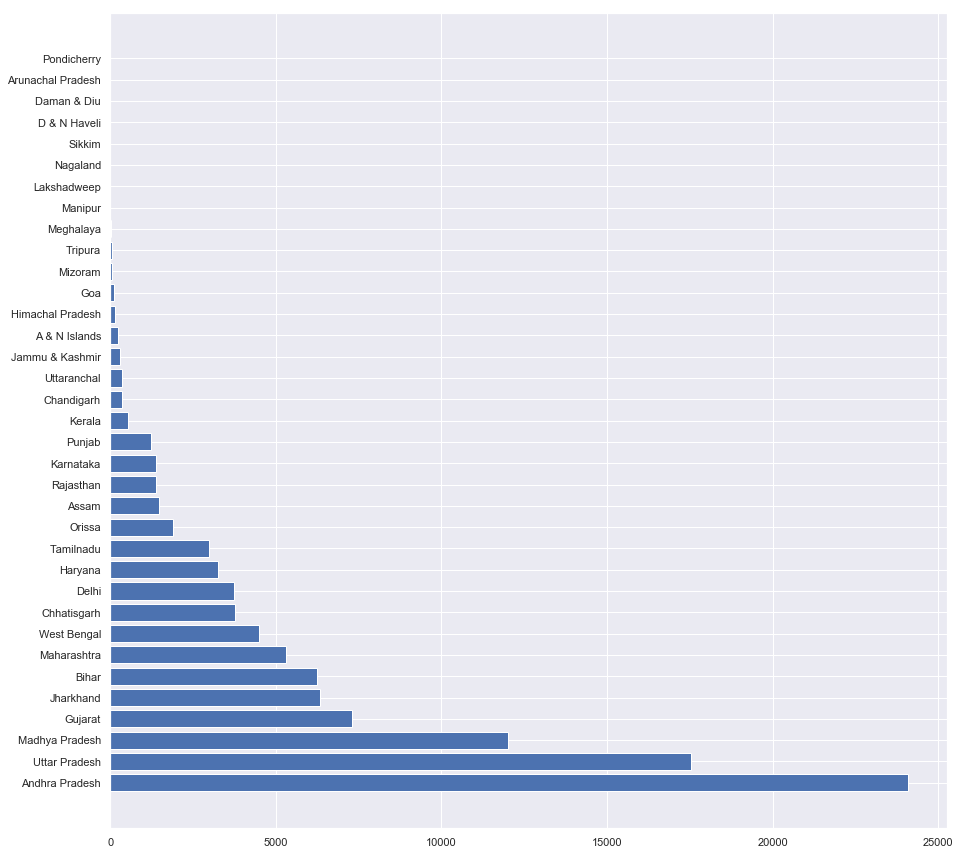

In [25]:
plt.figure(figsize=(15, 15))
plt.barh(y=total_benefitted.index, 
         width=total_benefitted, data=total_benefitted.sort_values())
plt.show()

### Step 6: Create a pie chart to show ratio among different modes of benefits

In [27]:
total_adults_benefit = data['No. of Inmates benefitted by Adult Education'].sum(axis=0)

In [28]:
total_elementary = data['No. of Inmates benefitted by Elementary Education'].sum(axis=0)

In [29]:
total_higher = data['No. of Inmates benefitted by Higher Education'].sum(axis=0)

In [30]:
total_computer = data['No. of Inmates benefitted by Computer Course'].sum(axis=0)

In [31]:
total_benefits = {'Adults Benefits': total_adults_benefit,
                 'Elementary Benefits': total_elementary,
                 'Higher Benefits': total_higher,
                 'Computer Benefits': total_computer}

In [32]:
total_benefits_df = pd.Series(data=total_benefits)

In [33]:
total_benefits_df

Adults Benefits        53720
Elementary Benefits    37027
Higher Benefits         8311
Computer Benefits       7356
dtype: int64

([<matplotlib.patches.Wedge at 0x240888345c0>,
 [Text(-0.016658933777995516, 1.0998738472776688, 'Adults Benefits'),
  Text(-0.47586704130371094, -0.9917411754086106, 'Elementary Benefits'),
  Text(0.8555421853426585, -0.6914098416273147, 'Higher Benefits'),
  Text(1.0741631195981802, -0.23700968861020405, 'Computer Benefits')],
 [Text(-0.009086691151633916, 0.5999311894241829, '50.48'),
  Text(-0.25956384071111505, -0.5409497320410602, '34.80'),
  Text(0.4666593738232682, -0.37713264088762616, '7.81'),
  Text(0.5859071561444619, -0.1292780119692022, '6.91')])

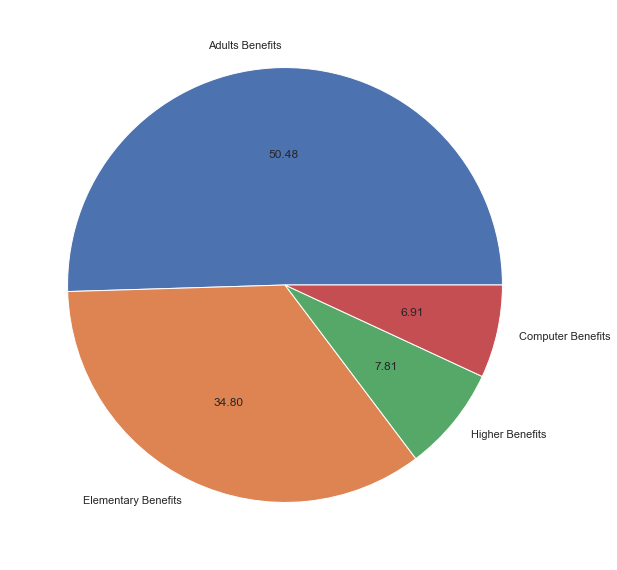

In [37]:
plt.figure(figsize=(15, 10))
plt.pie(total_benefits_df, labels=total_benefits_df.index, 
        autopct="%.2f", explode=(0, 0, 0, 0))

### Step 7: For the 5 highest benefitted states, create 
1. Bar chart. 
2. Stacked bar chart 
3. 100% stacked chart

In [38]:
data.head(1)

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
STATE/UT,,,,,,
Andhra Pradesh,2013,9480,13758,672,170,24080


In [39]:
highest_benefitted = data['total_benefitted'].sort_values(ascending=False)[:5]

In [40]:
highest_states = highest_benefitted.index.tolist()

In [41]:
highest_states

['Andhra Pradesh', 'Uttar Pradesh', 'Madhya Pradesh', 'Gujarat', 'Jharkhand']

In [67]:
highest_benefitted = data[int_columns][data.index.isin(highest_states)]

In [68]:
highest_benefitted

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
STATE/UT,,,,
Andhra Pradesh,9480,13758,672,170
Gujarat,2310,3133,875,966
Jharkhand,3008,2595,138,574
Madhya Pradesh,1978,9574,301,151
Uttar Pradesh,7876,8093,1353,212


In [50]:
highest_benefitted.columns

Index(['No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course'],
      dtype='object')

In [71]:
highest_benefitted.rename({
    'No. of Inmates benefitted by Elementary Education': 'Elementary Edu',
    'No. of Inmates benefitted by Adult Education': 'Adult Edu',
    'No. of Inmates benefitted by Higher Education': 'Higher Edu',
    'No. of Inmates benefitted by Computer Course': 'Computer Course'
}, axis=1, inplace=True)

### Bar Chart

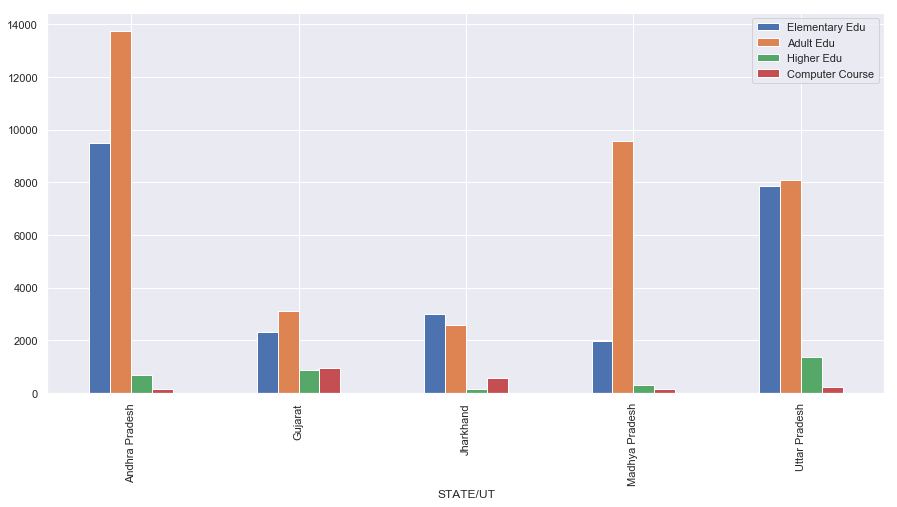

In [56]:
sns.set(rc={'figure.figsize':(15, 7)})
highest_benefitted.plot(kind='bar')

### Stacked Chart

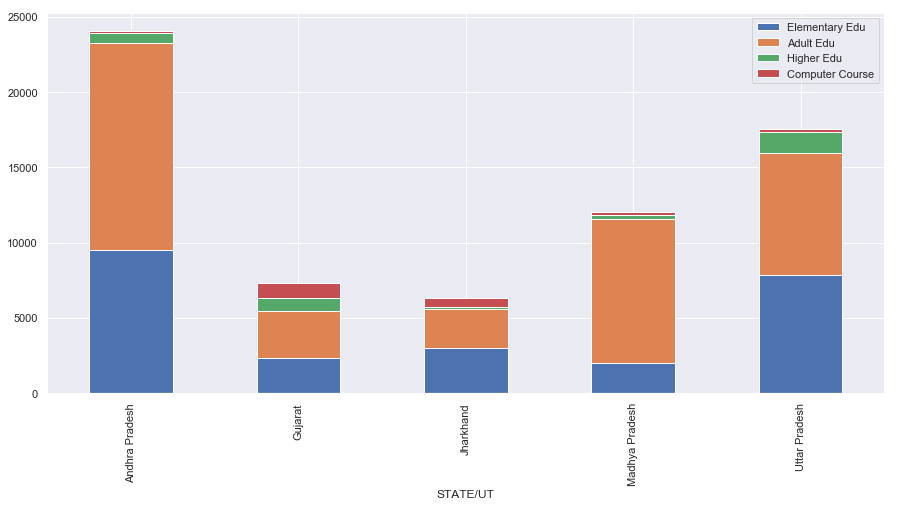

In [55]:
sns.set(rc={'figure.figsize':(15,7)})
highest_benefitted.plot(kind='bar', stacked=True)

### 100% Stacked Bar Chart

In [63]:
highest_benefitted = highest_benefitted.apply(lambda x: round(100 * x/float(x.sum())))

In [73]:
highest_benefitted['Total'] = highest_benefitted['Elementary Edu'] + highest_benefitted['Adult Edu'] + highest_benefitted['Higher Edu'] + highest_benefitted['Computer Course']

In [74]:
highest_benefitted

,Elementary Edu,Adult Edu,Higher Edu,Computer Course,Total
STATE/UT,,,,,
Andhra Pradesh,9480,13758,672,170,24080
Gujarat,2310,3133,875,966,7284
Jharkhand,3008,2595,138,574,6315
Madhya Pradesh,1978,9574,301,151,12004
Uttar Pradesh,7876,8093,1353,212,17534


In [75]:
new_data = highest_benefitted.apply(lambda x: round(100 * x/highest_benefitted['Total']))

In [78]:
new_data.drop('Total', axis=1, inplace=True)

In [64]:
highest_benefitted

,Elementary Edu,Adult Edu,Higher Edu,Computer Course
STATE/UT,,,,
Andhra Pradesh,38.0,37.0,20.0,8.0
Gujarat,9.0,8.0,26.0,47.0
Jharkhand,12.0,7.0,4.0,28.0
Madhya Pradesh,8.0,26.0,9.0,7.0
Uttar Pradesh,32.0,22.0,41.0,10.0


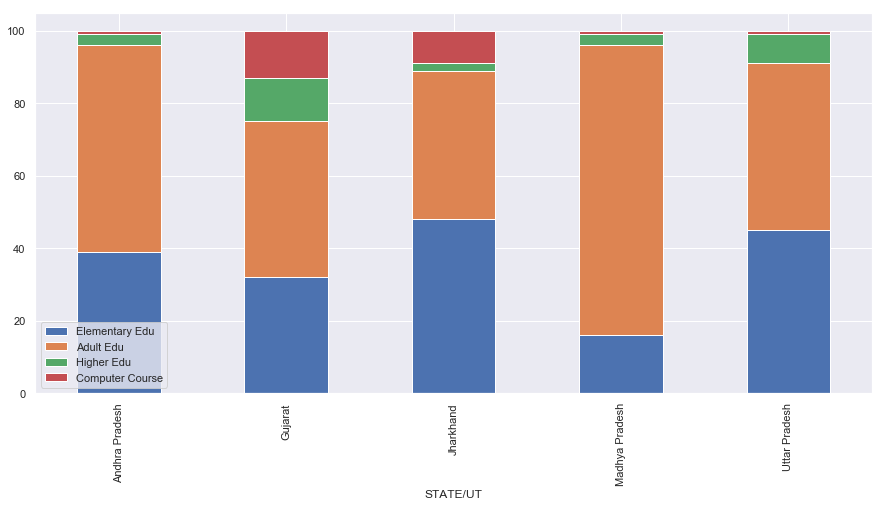

In [79]:
sns.set(rc={'figure.figsize':(15,7)})
new_data.plot(kind='bar', stacked=True)